<a href="https://colab.research.google.com/github/nissi00/machine-learning/blob/main/r%C3%A9seau_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans notre travail nous prédirons le prix d'une maison en se basant sur un jeu de données. La méthode utilisée sera l'implémentation d'un réseau de neuronne au vue de la grande taille de nos données.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('house_price_prediction.csv')

# Exploration des données

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
data.shape

(1460, 81)

In [47]:
data.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
data.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


<Axes: >

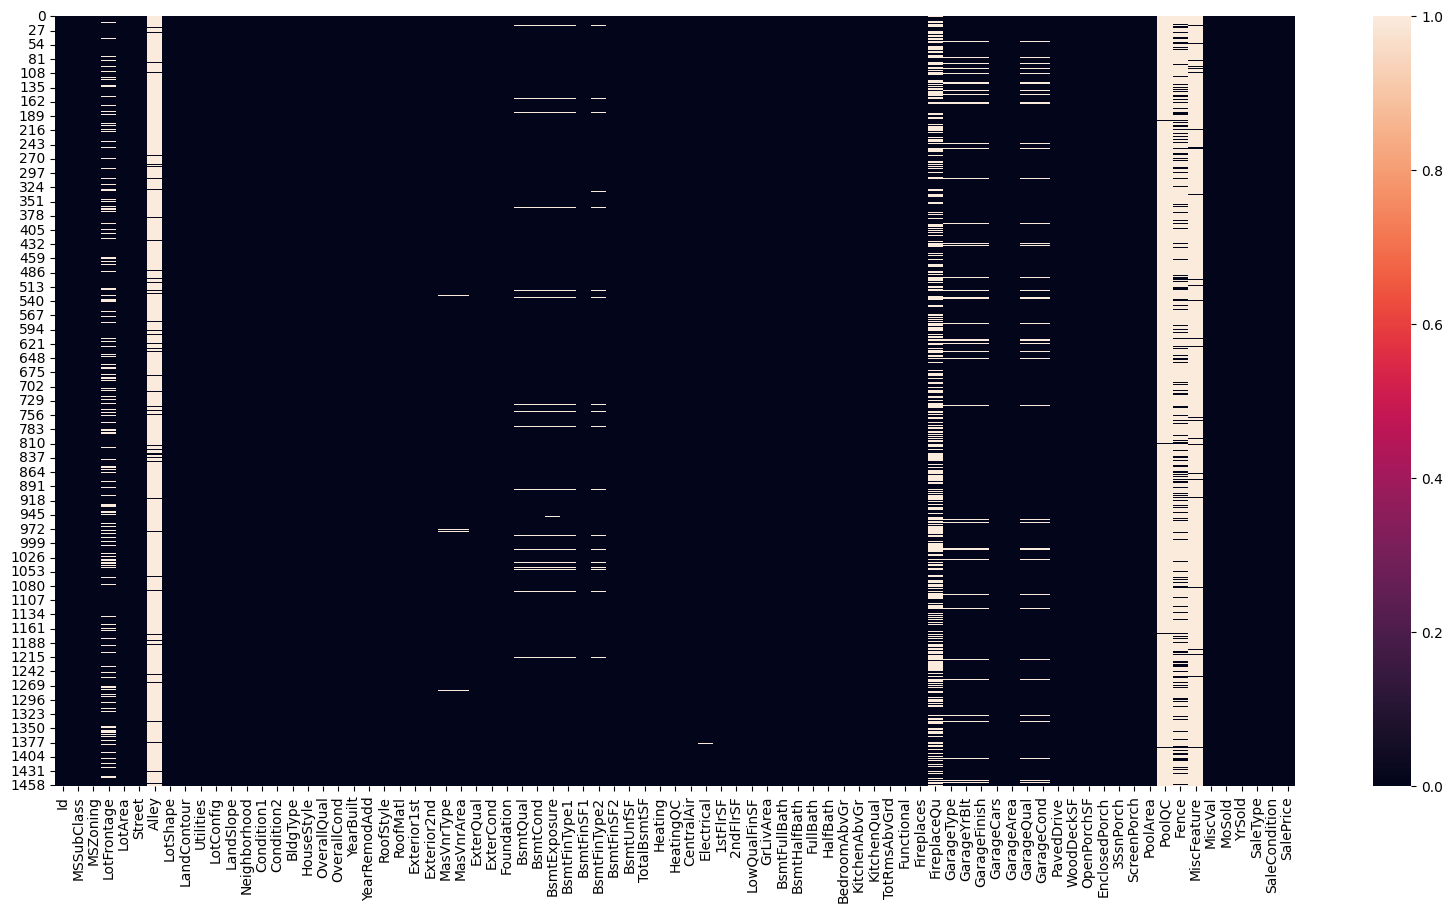

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar = True)

On remarqu'il y a assez de valeurs manquantes dans les colonnes Alley , PoolQC,	Fence, FireplaceQu, Lotfrontage, MiscFeature. On les supprimera donc de notre dataset

In [50]:
data=data.drop('PoolQC', axis = 1)

In [51]:
data=data.drop('Alley', axis = 1)

In [52]:
data=data.drop('LotFrontage', axis = 1)

In [53]:
data=data.drop('FireplaceQu', axis = 1)

In [54]:
data=data.drop('Fence', axis = 1)

In [55]:
data=data.drop('MiscFeature', axis = 1)

In [56]:
data.isna().sum().sort_values(ascending = False)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
HeatingQC        0
SalePrice        0
Length: 75, dtype: int64

# Data pre-processing

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [59]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [60]:
label_data = data.copy()

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Sélection des colonnes catégorielles
s = (data.dtypes == "object")
object_cols = list(s[s].index)

# Création de l'encodeur one-hot
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(data[object_cols])

# Récupération des noms des colonnes encodées
encoded_cols = onehot_encoder.get_feature_names_out(object_cols)

# Création d'un DataFrame avec les données encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

# Concaténation des données encodées avec les autres colonnes numériques
data_encoded = pd.concat([data.drop(object_cols, axis=1), encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
label_data=data_encoded.drop('Id', axis =1)

In [63]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 281 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(247), int64(34)
memory usage: 3.1 MB


In [64]:
label_data = label_data.replace(np.nan, 0)

In [65]:
total_nan_values = label_data.isnull().sum().sum()
print (total_nan_values)


0


<Axes: >

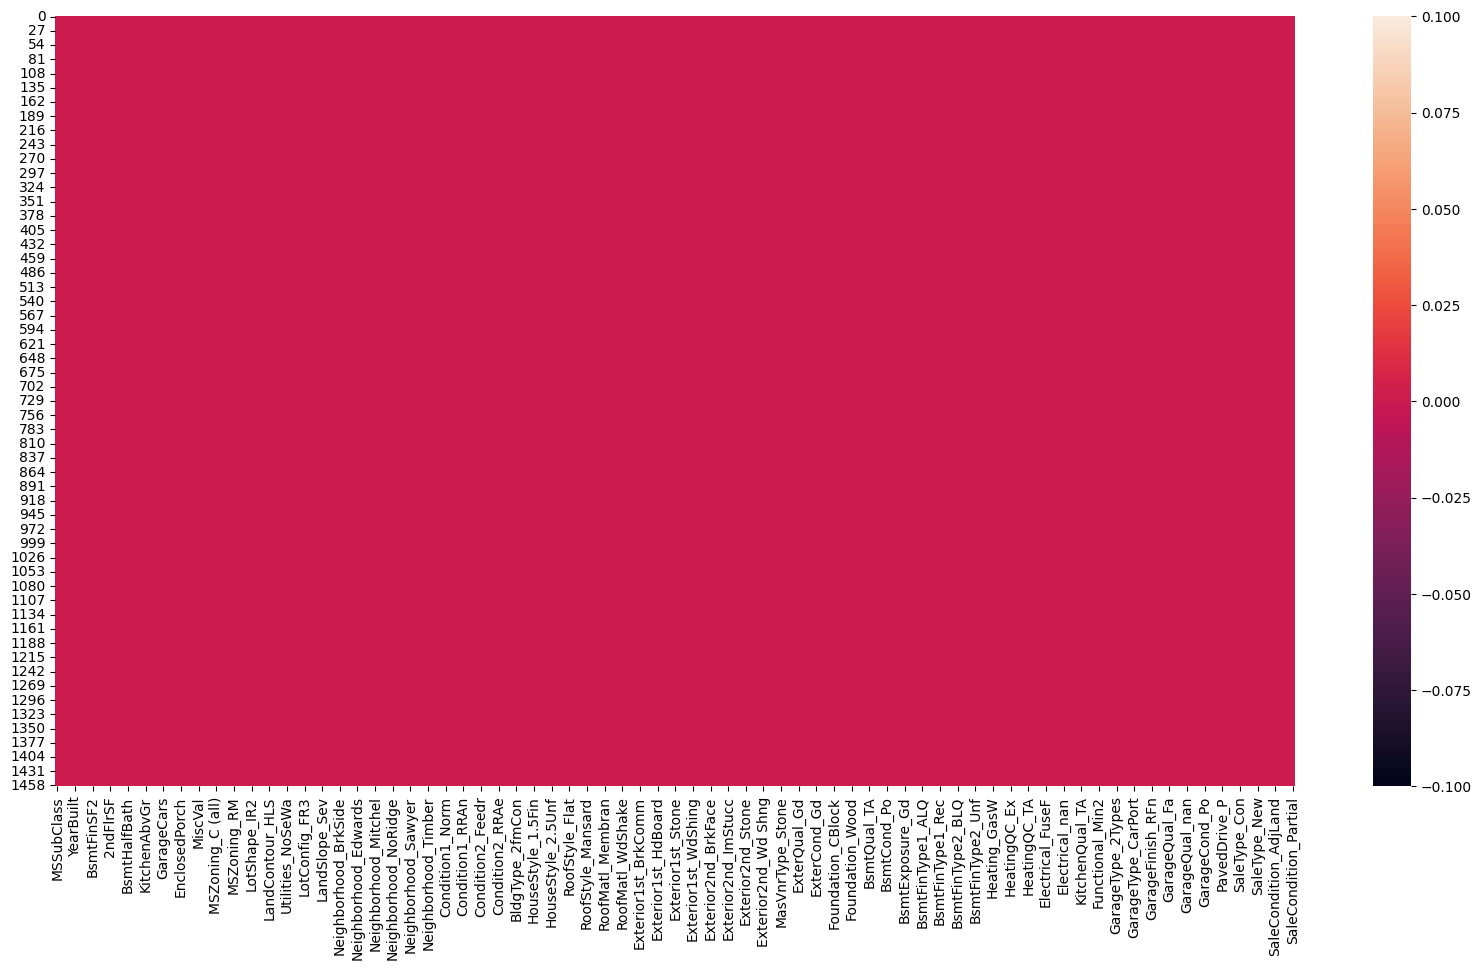

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(label_data.isna(), cbar = True)

<Axes: >

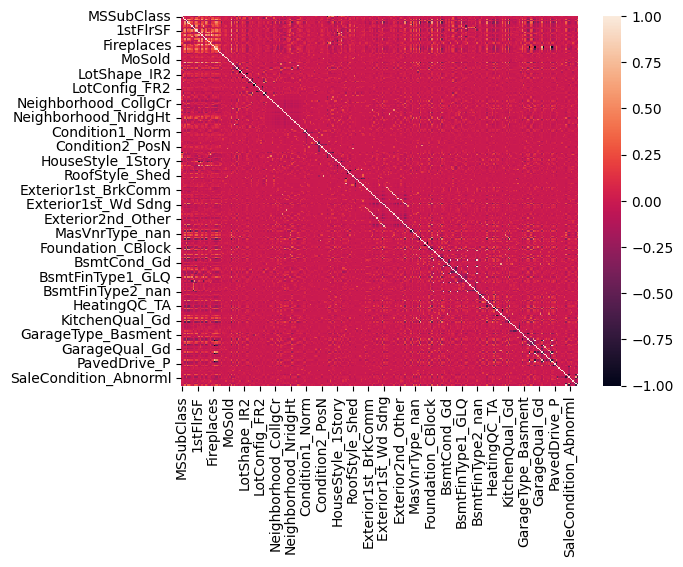

In [67]:
sns.heatmap(label_data.corr())

In [68]:
X = label_data.drop('SalePrice',axis =1).values
y = label_data['SalePrice'].values
#splitting Train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


# Construction du modèle

In [69]:
from sklearn.preprocessing import RobustScaler
s_scaler = RobustScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [70]:
from sklearn.preprocessing import RobustScaler


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [72]:
model = Sequential()

model.add(Dense(35,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [73]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
8/8 [==============================] - 2s 46ms/step - loss: 39426482176.0000 - val_loss: 38254157824.0000
Epoch 2/400
8/8 [==============================] - 0s 14ms/step - loss: 39424880640.0000 - val_loss: 38252560384.0000
Epoch 3/400
8/8 [==============================] - 0s 13ms/step - loss: 39423279104.0000 - val_loss: 38250373120.0000
Epoch 4/400
8/8 [==============================] - 0s 15ms/step - loss: 39420604416.0000 - val_loss: 38246760448.0000
Epoch 5/400
8/8 [==============================] - 0s 12ms/step - loss: 39415971840.0000 - val_loss: 38240288768.0000
Epoch 6/400
8/8 [==============================] - 0s 12ms/step - loss: 39407321088.0000 - val_loss: 38228475904.0000
Epoch 7/400
8/8 [==============================] - 0s 13ms/step - loss: 39392018432.0000 - val_loss: 38206103552.0000
Epoch 8/400
8/8 [==============================] - 0s 12ms/step - loss: 39362158592.0000 - val_loss: 38162251776.0000
Epoch 9/400
8/8 [==============================] - 0s 16

In [74]:
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [75]:
from sklearn import metrics

print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Squared Error: 1905391397.37
Root Mean Squared Error: 43650.79
Variance score is: 0.69


In [76]:
y_pred_2 = []
for pred in y_pred:
  y_pred_2.append(pred[0])

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
df1 = df.tail(20).T
df1

,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481
Actual,72500.000000,86000.000000,189000.00000,119000.000000,227000.000000,109900.000000,149900.00,215000.00,173000.000000,229456.0000,135000.000,130000.000000,197000.0000,328900.000,143000.000000,260000.0000,172500.00000,148000.0000,141000.000000,124500.000000
Predicted,91904.765625,72372.992188,191169.40625,113101.140625,238947.796875,128197.242188,163672.75,226787.75,155279.734375,236128.9375,144349.375,106207.179688,190981.5625,256786.375,126047.132812,276487.0625,210478.59375,146167.4375,127497.609375,135231.421875


<---- [clustering](https://colab.research.google.com/drive/1X3V0bUwtHXPmPJQLLnI_-51tHzOAmqfC?usp=sharing#scrollTo=ni55-_Q_jW1b)